In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are availabl e in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/playground-series-s4e7/train.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## **Objectives & Requirements**
**Your Goal:** The objective of this competition is to predict which customers respond positively to an automobile insurance offer.

**Evaluation:**
Submissions are evaluated using area under the ROC curve using the predicted probabilities and the ground truth targets.

**Submission File**
For each id row in the test set, you must predict the probability of the target, Response. The file should contain a header and have the following format:

| id        | Response |
|-----------|----------|
| 11504798  | 0.5      |
| 11504799  | 0.5      |
| 11504800  | 0.5      |
| 11509379  | 0.5      |


## 1. DATA ACQUISITION

* The data has been obtained from the source in this competition in CSV.

In [2]:
#import data from files in the competition
df_s = pd.read_csv("/kaggle/input/playground-series-s4e7/sample_submission.csv")
df_tr = pd.read_csv("/kaggle/input/playground-series-s4e7/train.csv")
df_ts = pd.read_csv("/kaggle/input/playground-series-s4e7/test.csv")

## 2. Exploratory Data Analysis

Involves looking at features, trying to find anomalies and also to understand patterns between all the features relative to target "Response".

In [3]:
df_tr.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [5]:
df_ts.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [6]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669866 entries, 0 to 7669865
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 643.7+ MB


In [7]:
df_tr.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [8]:
df_ts.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06
mean,1.533973e+07,3.839137e+01,9.980208e-01,2.642661e+01,4.630772e-01,3.046553e+04,1.123650e+02,1.638996e+02
std,2.214100e+06,1.499951e+01,4.444387e-02,1.299433e+01,4.986349e-01,1.644586e+04,5.407358e+01,7.998445e+01
min,1.150480e+07,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01
25%,1.342226e+07,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.528000e+04,2.900000e+01,9.900000e+01
50%,1.533973e+07,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182700e+04,1.510000e+02,1.660000e+02
75%,1.725720e+07,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.946000e+04,1.520000e+02,2.320000e+02
max,1.917466e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02


In [9]:
df_tr.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
df_ts.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

>**Insights:**

Data has no null values and duplicate values. Therefore cleaning won't be required here.


<Axes: xlabel='Response'>

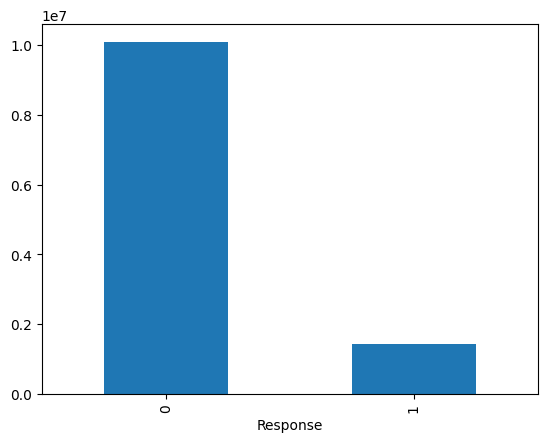

In [11]:
df_tr['Response'].value_counts().plot(kind ='bar')

>Insights: Most values in Response feature are 0 (No) and very few are 1 (Yes). 

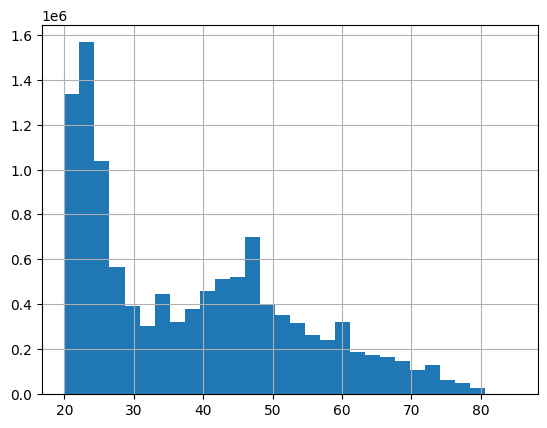

In [12]:
#Univariate Analysis
import matplotlib.pyplot as plt
df_tr['Age'].hist(bins= 30)
plt.show()

>Insight: Age 20-30 are individuals that have just started out in the career. Age 40 - 50 are individuals who have school going children - basically a family. These groups are most important in this analysis.

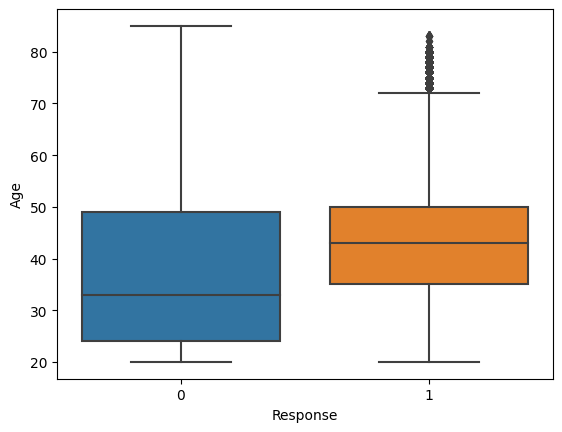

In [13]:
#Correlation through Boxplot between Response & Age
import seaborn as sns
sns.boxplot(x = 'Response', y = 'Age', data = df_tr)
plt.show()

>**Insight:** Box plot is best suited for correlation when the target variable is categorical. In this case, the median age of individuals who responded "No" is near 35. The median age for Responders who said "Yes" is near 45. Why is that?🤔

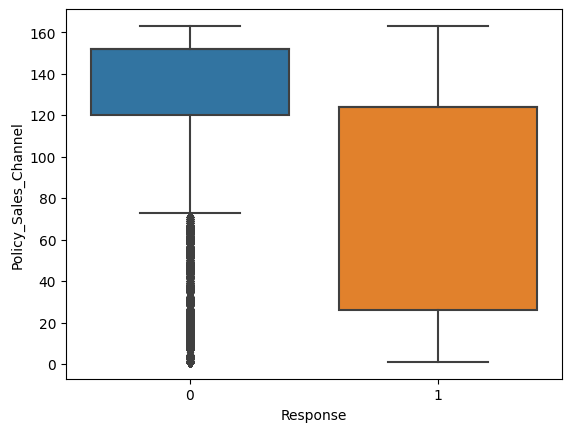

In [14]:
#Correlation between Response & Policy_Sales_Channel
sns.boxplot(x = "Response", y = "Policy_Sales_Channel", data = df_tr)
plt.show()


>**Insights:** Suggests that Policy_Sales_Channel should be at average value to attract more customers to avail insurance.

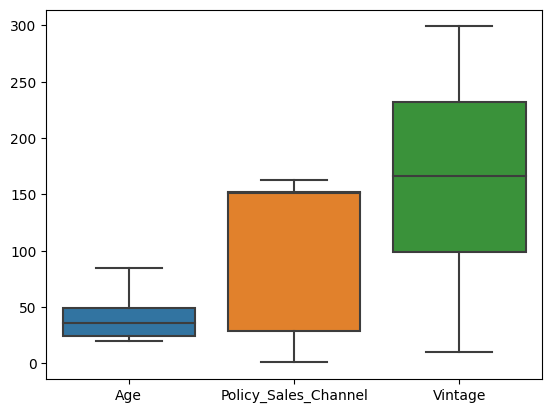

In [15]:
#Find out outliers
sns.boxplot(data = df_tr[['Age','Policy_Sales_Channel', 'Vintage']])
plt.show()

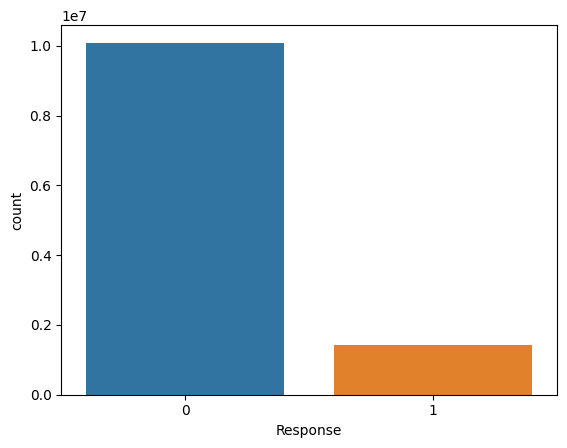

In [16]:
#See how many No's & Yes' does Response have
sns.countplot(data = df_tr, x = 'Response')
plt.show()

In [17]:
df_tr['Response'].value_counts()

Response
0    10089739
1     1415059
Name: count, dtype: int64

**Response:**

Majority = No

Minority = Yes

In [18]:
import warnings 
warnings.filterwarnings("ignore")
#sns.pairplot(df_tr, hue = "Response")
#plt.show()

In [19]:
#lets drop duplicates & Null values - if any
df_tr.drop_duplicates(inplace = True)
df_tr.dropna(inplace = True)

## Solution to memory Problem
**Issue:** This computation is consuming a lot of RAM which is slowing down the process as well as crashing it sometimes.

**Solution:** Using a commonly used Memory usage reduction function that will downcase numerical columns while converting object columns to category type.

In [20]:
import pandas as pd
import numpy as np

def reduce_memory_usage(df):
    """
    Reduce memory usage of a DataFrame by downcasting numeric types and converting object types to categorical types.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to optimize.
    
    Returns:
    pd.DataFrame: The optimized DataFrame.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print(f'Initial memory usage: {start_mem:.2f} MB')

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print(f'Final memory usage: {end_mem:.2f} MB')
    print(f'Memory usage decreased by {(start_mem - end_mem) / start_mem * 100:.1f}%')

    return df


In [21]:
#apply memory usage reduction function on df_tr & df_ts
df_tr = reduce_memory_usage(df_tr)
df_ts = reduce_memory_usage(df_ts)

Initial memory usage: 1053.30 MB
Final memory usage: 230.41 MB
Memory usage decreased by 78.1%
Initial memory usage: 643.68 MB
Final memory usage: 146.29 MB
Memory usage decreased by 77.3%


## Data Scaling

🔧 Data Scaling: Adjusts feature values to a common range for balanced model performance.

⚖️ Without Scaling: Algorithms may prioritize larger values, skewing results and reducing accuracy.

In [22]:
#Lets scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


In [23]:
#Applying Standard Scalar & MinMax Scaler
# create an object around standard scaler
scaler = StandardScaler()
#fit & transform train data
x_train_scale = scaler.fit_transform(df_tr[['Region_Code', 'Policy_Sales_Channel','Vintage']])
#fit & transform test data
x_test_scale = scaler.fit_transform(df_ts[['Region_Code', 'Policy_Sales_Channel','Vintage']])
#Create an object around MinMaxScaler
scaler2 = MinMaxScaler()
#Fit & transform train data
x_train_minmax = scaler2.fit_transform(df_tr[['Annual_Premium']])
#Fit & transform test data
x_test_minmax = scaler2.fit_transform(df_ts[['Annual_Premium']])

**🔧 StandardScaler:** 📏 Normalizes features to a mean of 0 and standard deviation of 1, perfect for data with normal distribution.

**📉 MinMaxScaler:** 🏞️ Scales features to a range (0, 1), ideal for preserving the relationships in the original data.

Other methods weren't chosen because these two ensure consistent and balanced data for our specific needs! 🌟

In [24]:
print("x_train_scale=", x_train_scale,"\n x_test_scale=" ,x_test_scale, "\n x_train_minmax=" ,x_train_minmax,"\n x_test_minmax=", x_test_minmax)

x_train_scale= [[ 0.6605281   0.21420203  0.28885213]
 [ 0.121718   -1.5994136   1.5516753 ]
 [-0.9559022   0.73237795  1.1265665 ]
 ...
 [ 0.4296095   0.73237795  0.31385854]
 [ 0.121718   -1.5994136   1.3766305 ]
 [ 0.121718    0.73237795  0.31385854]] 
 x_test_scale= [[ 1.5832593   0.88092947  0.80141115]
 [ 0.12108258  0.21516992 -0.51134413]
 [ 1.2754327  -1.5971754   1.3390157 ]
 ...
 [ 0.50586593  0.4740764  -1.26149   ]
 [ 0.12108258  0.21516992 -0.56135386]
 [ 1.5063027   0.7329829  -1.0614511 ]] 
 x_train_minmax= [[0.11621755]
 [0.10470202]
 [0.06588036]
 ...
 [0.        ]
 [0.08522794]
 [0.0562289 ]] 
 x_test_minmax= [[0.        ]
 [0.06483857]
 [0.        ]
 ...
 [0.        ]
 [0.06741142]
 [0.04626304]]


## Data Encoding

🎭 Transforms categorical data into numerical form for model training.

In [25]:
#I prefer One-hot encoding for this project as the categorical features have only 2 - 3 feature categories
colums_encode_tr = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
df_tr_encoded = pd.get_dummies(df_tr, columns = colums_encode_tr , drop_first = True).astype(int)
df_tr_encoded.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,0,21,1,35,0,65101,124,187,0,1,0,0,1
1,1,43,1,28,0,58911,26,288,1,1,0,1,1
2,2,25,1,14,1,38043,152,254,0,0,1,0,0
3,3,35,1,1,0,2630,156,76,0,0,0,0,1
4,4,36,1,15,1,31951,152,294,0,0,0,0,0


**🏳️ One-Hot Encoding:** 📊 Converts each category into a separate binary column, ensuring no ordinal relationship is imposed on our categories.

In [26]:
colums_encode_ts = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
df_ts_encoded = pd.get_dummies(df_ts, columns = colums_encode_ts , drop_first = True).astype(int)
df_ts_encoded.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,11504798,20,1,47,0,2630,160,228,0,1,0,0
1,11504799,47,1,28,0,37483,124,123,1,0,0,1
2,11504800,47,1,43,0,2630,26,271,1,0,0,1
3,11504801,22,1,47,1,24502,152,115,0,1,0,0
4,11504802,51,1,19,0,34115,124,148,1,0,0,0


In [27]:
df_tr = df_tr_encoded
df_ts = df_ts_encoded

Other methods, like label encoding, weren't used as they can mislead the model by implying a rank or order among categories. 🔢🚫

In [28]:
df_tr.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,0,21,1,35,0,65101,124,187,0,1,0,0,1
1,1,43,1,28,0,58911,26,288,1,1,0,1,1
2,2,25,1,14,1,38043,152,254,0,0,1,0,0
3,3,35,1,1,0,2630,156,76,0,0,0,0,1
4,4,36,1,15,1,31951,152,294,0,0,0,0,0


In [29]:
df_ts.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,11504798,20,1,47,0,2630,160,228,0,1,0,0
1,11504799,47,1,28,0,37483,124,123,1,0,0,1
2,11504800,47,1,43,0,2630,26,271,1,0,0,1
3,11504801,22,1,47,1,24502,152,115,0,1,0,0
4,11504802,51,1,19,0,34115,124,148,1,0,0,0


## Model Development

**🎯 Model Aims:** 🏆 Predict the response variable with high accuracy, specifically aiming for a validation AUC of 0.90.

**🛠️ Behind the Scenes:**

📚 Learning Patterns: Analyzes input features to find relationships with the target.

🧠 Training: Adjusts parameters iteratively to minimize errors.

📝 Validation: Checks performance on unseen data to ensure generalization.

In [30]:
#Let's make data available for the model
X_tr = df_tr.drop(columns = ['Response'])
y_tr = df_tr['Response']

## CatBoost Model
**Choosing CatBoost:**

1. Categorical Handling:

🚀 Directly supports categorical features, simplifying preprocessing.

2. Performance:

🏃‍♂️ Fast training and prediction.
📈 High accuracy, demonstrated by our AUC scores.

3. Overfitting Prevention:

🛡️ Uses techniques like ordered boosting.

4. Ease of Use:

🧩 Simple hyperparameter tuning.
🔧 Automatic handling of missing values and various data types.

>**Why Not XGBoost & RandomForestClassifier:**

🐍 XGBoost/LightGBM require more complex preprocessing & have problems with invalid characters in feature names i.e > or -.

📊 Logistic Regression/Random Forest didn't perform as well.

In [31]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

In [32]:
# Cross validation function to obtain model scores for catboost
def cross_validate_model_catboost(model, X, y, n_splits=10, seed=42):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
    train_scores = []
    val_scores = []
    
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=100, verbose=100)
        
        y_train_pred_proba = model.predict_proba(X_train)[:, 1]
        train_auc = roc_auc_score(y_train, y_train_pred_proba)
        train_scores.append(train_auc)
        
        y_val_pred_proba = model.predict_proba(X_val)[:, 1]
        val_auc = roc_auc_score(y_val, y_val_pred_proba)
        val_scores.append(val_auc)
        
        print(f"Fold {fold}: Train AUC = {train_auc:.4f}, Validation AUC = {val_auc:.4f}")

    mean_train_auc = np.mean(train_scores)
    mean_val_auc = np.mean(val_scores)
    
    print(f"\nMean Train AUC: {mean_train_auc:.4f}")
    print(f"Mean Validation AUC: {mean_val_auc:.4f}")
    
    return model, train_scores, val_scores

In [33]:
# Define the parameter grid
param_grid = {
    'iterations': [200, 500],
    'depth': [6, 8],
    'learning_rate': [0.01, 0.05],
    'l2_leaf_reg': [1, 3]
}

In [34]:
#Set the model on CPU
grid_search = GridSearchCV(
    estimator=CatBoostClassifier(task_type='CPU', verbose=100, random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1)

In [35]:
#obtain the best hyperparameter
grid_search.fit(X_tr, y_tr)

# Retrieve the best model and parameters
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
0:	learn: 0.5956760	total: 3.68s	remaining: 12m 11s
100:	learn: 0.2621603	total: 5m 3s	remaining: 4m 57s
199:	learn: 0.2597150	total: 9m 51s	remaining: 0us
[CV] END depth=6, iterations=200, l2_leaf_reg=1, learning_rate=0.05; total time=10.2min
0:	learn: 0.5958812	total: 2.3s	remaining: 7m 37s
100:	learn: 0.2623999	total: 4m 52s	remaining: 4m 46s
199:	learn: 0.2598457	total: 9m 35s	remaining: 0us
[CV] END depth=6, iterations=200, l2_leaf_reg=1, learning_rate=0.05; total time=10.0min
0:	learn: 0.6730251	total: 3.6s	remaining: 11m 56s
100:	learn: 0.2815705	total: 5m 15s	remaining: 5m 9s
199:	learn: 0.2679061	total: 10m 13s	remaining: 0us
[CV] END depth=6, iterations=200, l2_leaf_reg=1, learning_rate=0.01; total time=10.5min
0:	learn: 0.5970468	total: 2.87s	remaining: 9m 30s
100:	learn: 0.2623101	total: 5m 1s	remaining: 4m 55s
199:	learn: 0.2598928	total: 9m 41s	remaining: 0us
[CV] END depth=6, iterations=200, l2_leaf_reg=1, lear

In [36]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'depth': 8, 'iterations': 500, 'l2_leaf_reg': 3, 'learning_rate': 0.05}


In [37]:
#train the model
best_model = CatBoostClassifier(
    task_type='GPU',
    random_state=42,
    **grid_search.best_params_  # Corrected variable name
)

In [38]:
trained_model, train_scores, val_scores = cross_validate_model_catboost(best_model, X_tr, y_tr)

0:	learn: 0.5993430	test: 0.5992526	best: 0.5992526 (0)	total: 12.3s	remaining: 1h 42m 14s
100:	learn: 0.2610113	test: 0.2610951	best: 0.2610951 (100)	total: 19.1s	remaining: 1m 15s
200:	learn: 0.2588370	test: 0.2589617	best: 0.2589617 (200)	total: 25.9s	remaining: 38.5s
300:	learn: 0.2576240	test: 0.2577774	best: 0.2577774 (300)	total: 32.7s	remaining: 21.6s
400:	learn: 0.2567998	test: 0.2569780	best: 0.2569780 (400)	total: 39.4s	remaining: 9.72s
499:	learn: 0.2562311	test: 0.2564335	best: 0.2564335 (499)	total: 46.1s	remaining: 0us
bestTest = 0.256433456
bestIteration = 499
Fold 1: Train AUC = 0.8730, Validation AUC = 0.8726
0:	learn: 0.5993961	test: 0.5993460	best: 0.5993460 (0)	total: 70.2ms	remaining: 35s
100:	learn: 0.2610351	test: 0.2608840	best: 0.2608840 (100)	total: 6.82s	remaining: 26.9s
200:	learn: 0.2588287	test: 0.2587548	best: 0.2587548 (200)	total: 13.6s	remaining: 20.3s
300:	learn: 0.2575025	test: 0.2574875	best: 0.2574875 (300)	total: 20.4s	remaining: 13.5s
400:	learn

**Note:** AUC score of 0.8730 is a bit closser to our aim of 0.90. However, you might work on improving this model.

## Model Testing & Submission

In [39]:
test_probabilities = trained_model.predict_proba(df_ts)[:, 1]
# Combine IDs with predictions
results = pd.DataFrame({
    'id': df_ts['id'],
    'Response': test_probabilities
})
# Save results to a CSV file
results.to_csv('Model Prediction CatBoost 0.8670.csv', index=False)

# Output the first few rows to verify
print(results.head())

         id  Response
0  11504798  0.011781
1  11504799  0.360740
2  11504800  0.258406
3  11504801  0.000099
4  11504802  0.031706


In [40]:
results.head()

,id,Response
0,11504798,0.011781
1,11504799,0.360740
2,11504800,0.258406
3,11504801,0.000099
4,11504802,0.031706


Results:

| id       | Response |
|----------|----------|
| 11504798 | 0.012115 |
| 11504799 | 0.358467 |
| 11504800 | 0.257715 |
| 11504801 | 0.000103 |
| 11504802 | 0.030740 |


And continues.

**Conclusion:**

    This insurance cross selling prediction model is to help individuals predict whether a person based on certain information avail vehicle insurance or not. It helps in marketing this opportunity to potential customers. The model can predict with 87.28% accuracy which can be improved.